# 앙상블 학습 (Ensemble Learning)

- 여러 개의 분류기(Classifier)을 사용해서 예측 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 단일 분류시 사용 때보다 신뢰성이 높은 예측값을 얻을 수 있음
- 쉽고 편하면서도 강력한 성능 보유
- 대부분의 정형 데이터 분류 시 뛰어난 성능을 나타냄
- 이미지, 영상, 음성 등의 비정형 데이터 분류 : 딥러닝 성능 뛰어남

### 대표적인 앙상블 알고리즘
- 랜덤 포레스트(Random Forrest)
- 그레디언트 부스팅(Gradient Boosting)

## 앙상블 알고리즘 변화
- 뛰어난 성능, 쉬운 사용 , 다양한 활용도로 인해 많이 애용되었고
- 부스팅 계열의 앙상블

- XGBoost
- LightBGM 
- Stacking 

## 앙상블 학습 유형
- 보팅(Voting)
- 배깅(Bagging)
- 부스팅(Boosting)
- 스태킹(Stacking)

- 보팅(Voting) : 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식 
- 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합

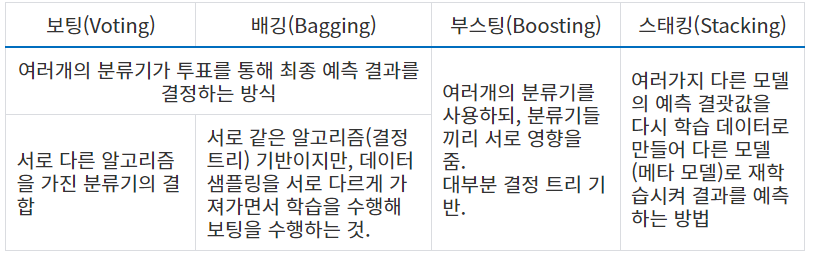

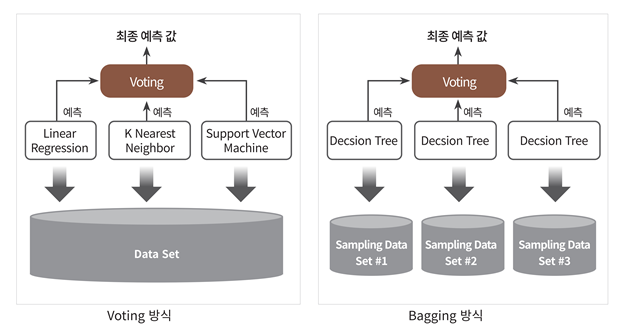

- 배깅 방식에서의 Voting은 Soft Voting이냐 Hard Voting이냐를 나타냄

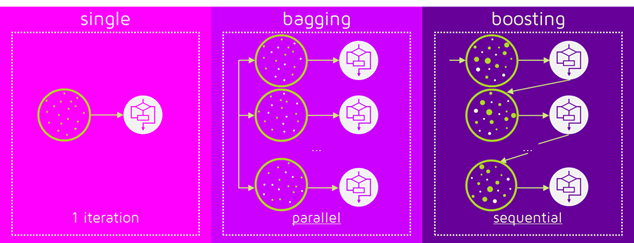
https://swalloow.github.io/bagging-boosting/

**배깅 : 샘플링을 서로 다르게 하면서 학습수행**
- 대표적인 배깅 방식 : 랜덤 포레스트 알고리즘
- 부트스트랩을 이용해서 학습데이터 세트만큼 각각 샘플링해서 DecisionTree를 적용함

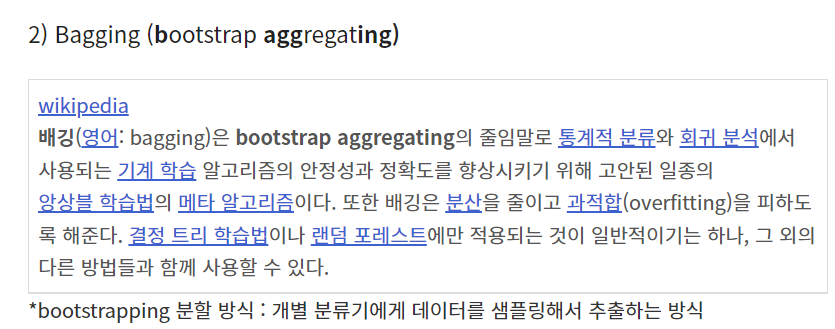

### 부스팅(Boosting)
- 예측 성능이 뛰어나 앙상블 학습 주도
- boost : 밀어 올림
- 각각의 결과에서의 오분류기에 가중치를 줘서 넘긴 후 나중에 최종 예측
    
**대표적인 부스팅 모듈**
- Gradient Boost
- XGBost(eXtra Gradient Boost)
- LightGBM(Light Gradient Boost)

앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에서는 가중치(Weight)를 부여하면서 학습과 예측을 진행하는 것을 boosting 이라고 합니다. 계속해서 분류기에게 가중치를 부스팅하면서 학습을 진행하기에 부스팅 방식으로 불립니다.

또한 예측 성능이 뛰어나 앙상블 학습을 주도하고 있으며 대표적은 부스팅 모듈로 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)이 있습니다.

### 스태킹
- 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방식

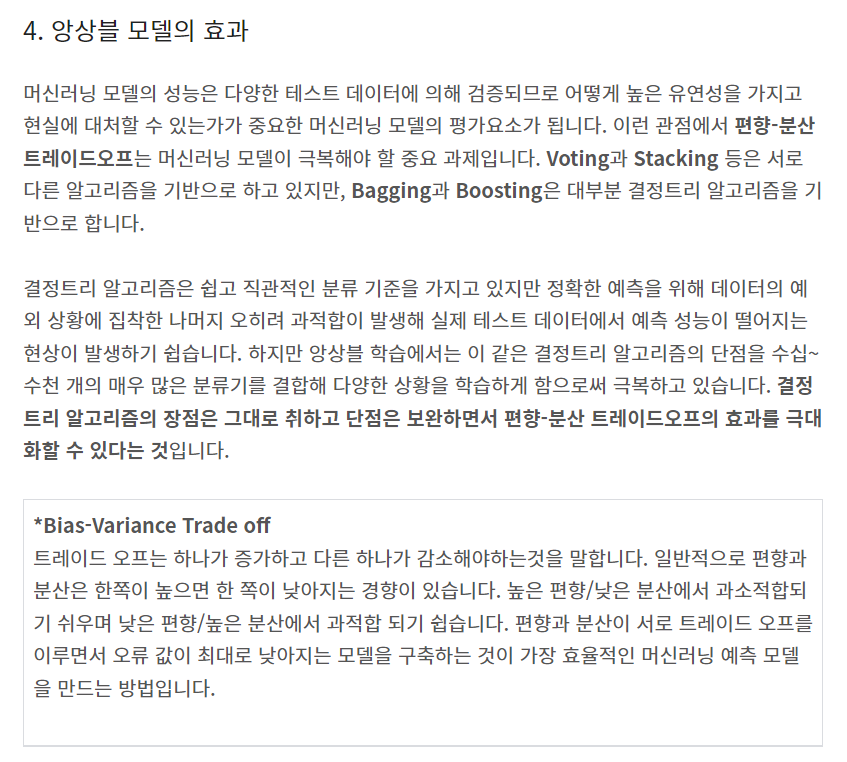

### 보팅 유형 
- 하드 보팅 (Hard Voting)
- 소프트 보팅 (Soft Voting)

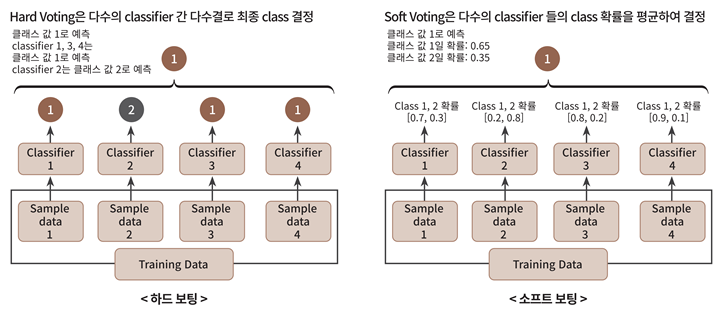

- 하드보팅은 : 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- 소프트 보팅은 : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

## Voting Classifier

### 보팅 방식의 앙상블 예제 : 위스콘신 유방암 데이터 세트 예측 분석  

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 위스콘신 유방암 데이터 로드

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
cancer_df = pd.DataFrame(data=cancer.data , columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교**

VotingClassifier 클래스의 주요 생성 인자
- estimators : 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음
- voting : 보팅 방식을 적용하는 의미 (하드/소프트)

In [11]:
# 개별 모델 객체 생성
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# Voting
vo_clf = VotingClassifier(estimators=[('LR', lr_clf) , ('KNN' , knn_clf)] ,
                         voting='soft')

# 학습데이터 / 평가데이터 분할

X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target , random_state=156 , test_size=0.2)

In [12]:
# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
acc = accuracy_score(y_test , pred)
print('보팅 분류기 정확도 :' , acc)

보팅 분류기 정확도 : 0.9473684210526315


C:\Users\hspar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# 로지스틱 회귀와 KNN 각개별 모델의 학습/예측/평가.
classifier = [lr_clf , knn_clf]

for clf in classifier:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test , pred)
    print(clf.__class__.__name__, '정확도:' , acc)

LogisticRegression 정확도: 0.9385964912280702
KNeighborsClassifier 정확도: 0.9385964912280702


C:\Users\hspar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
print(type(lr_clf))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [15]:
print(type(knn_clf))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


# 랜덤 포레스트(Random Forest)

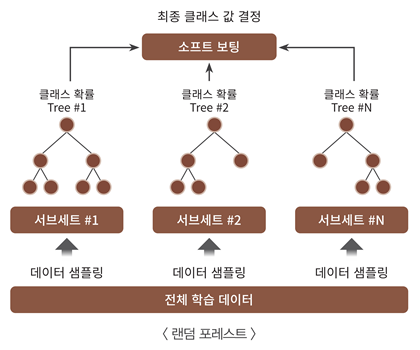

- 배깅은 앙상블 모델 가운데 하나의 형태로, 부트스트랩 샘플을 이용해 많은 모델들을 생성하고 이 모델들을 평균화한다. - 랜덤 포레스트는 배깅 기법을 의사 결정 트리 알고리즘에 적용한 특별한 형태이다.

### 랜덤 포레스트에서의 부트스트래핑 샘플링 방식

**부트스트래핑(bootstrapping) 분할 방식**
- 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
- 각 샘플링된 데이터 내에는 중복 데이터 포함

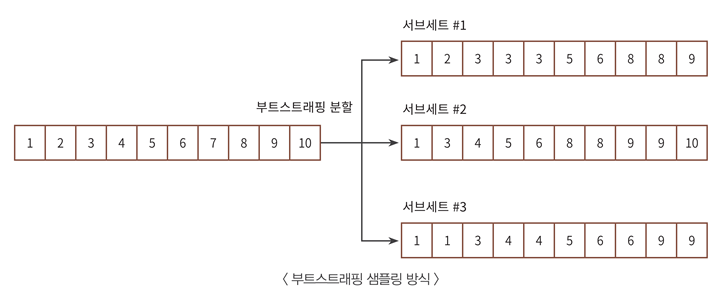

## 랜덤 포레스트 예제
- 앞의 사용자 행동 인식 데이터 세트를 
- 사이킷런의 RandomForestClassifier 클래스를 이용해 예측 수행

### 결정 트리에서 사용한 사용자 행동 인지 데이터 세트 로딩

In [16]:
def get_new_feature_name_df(old_feature_name_df):
    # 1. old_feature_name_df의 열이름 누적카운트를 계산한 데이터 프레임
    # 2. 1에서 생성한 데이터프레임의 인덱스를 reset
    # 3.  old_feature_name_df을 reset_index
    # 4. 2 , 3 의 두 데이터프레임을 merge
    # 5. 카운트 정보와 피처이름을 하나의 이름으로 변경 apply(lambda)
    # 6. 필요한 컬럼만 저장
    
    feature_cum_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount() , columns=['dup_cnt'])
    feature_cum_df.reset_index(inplace=True)
    old_feature_name_df.reset_index(inplace=True)
    new_feature_name_df = pd.merge(old_feature_name_df , feature_cum_df , how='outer')
    new_feature_name_df['new_column_name'] = new_feature_name_df[['column_name' , 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) if x[1]>0 else x[0] , axis=1)
    new_ = pd.DataFrame(new_feature_name_df['new_column_name'])
    
    return new_

In [17]:
def get_human_dataset():
    
    # 피처 정보 저장
    feature_name_df = pd.read_csv('datasets/human_activity/features.txt',
                                 sep='\s+' , header=None , names=['column_index' , 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_names = new_feature_name_df.iloc[:,-1].values.tolist()
    
    # 학습데이터셋 , 평가데이터 피처 셋 준비
    X_train = pd.read_csv('datasets/human_activity/train/X_train.txt',
                                 sep='\s+' , names=feature_names)
    
    X_test = pd.read_csv('datasets/human_activity/test/X_test.txt',
                                 sep='\s+' , names=feature_names)
    
    # 학습데이터셋 , 평가데이터 타깃(레이블) 셋 준비
    y_train = pd.read_csv('datasets/human_activity/train/y_train.txt',
                         sep='\s+' , header=None, names=['action'])
    
    y_test = pd.read_csv('datasets/human_activity/test/y_test.txt',
                         sep='\s+' , header=None, names=['action'])
    
    return X_train, X_test , y_train , y_test

### 학습/테스트 데이터로 분리하고

In [18]:
X_train , X_test , y_train , y_test = get_human_dataset()

## 랜덤 포레스트로 학습/예측/평가

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0) #n_estimator = 10 이 default값

# 학습
rf_clf.fit(X_train, y_train)

# 평가
pred = rf_clf.predict(X_test)

# 성능 출력
acc = accuracy_score(y_test, pred)
print('정확도:',rf_clf.__class__.__name__ ,  acc)

<ipython-input-19-50379e5a12fb>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


정확도: RandomForestClassifier 0.9253478113335596


- n_estimators : 랜덤포레스트에서 결정 트리의 개수를 지정한다. 디폴트는 10개 , 많이 설정할수록 좋은 성능을 기대할 수 있지만, 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님

- max_features는 결정 트리에 사용된 max_features 파라미터와 같다. 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt'와 같다. 따라서 랜덤포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조합니다.(전체 피처가 16개라면 분할을 위해 4개 참조)

- max_depth / min_samples_leaf / min_samples_split

### GridSearchCV 로 교차검증 및 하이퍼 파라미터 튜닝

**GridSearchCV 로 교차검증 및 하이퍼 파라미터 튜닝**
- 앞의 사용자 행동 데이터 세트 그대로 사용
- 튜닝 시간을 절약하기 위해 
    - n_estimators=100
    - cv=2

In [20]:
# GridSearchCV 하이퍼파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100],
         'max_depth' : [6, 8 , 10 , 12],
         'min_samples_split' : [8, 12, 20] , 
         'min_samples_leaf' : [8, 16 , 20]}

### 튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가

In [21]:
rf_clf = RandomForestClassifier(random_state=0 , n_jobs=1)
# n_jobs=-1 파라미터를 추가하면 모든 CPU 코어를 이용해 학습할 수 있다.

grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2 , n_jobs=-1)

grid_cv.fit(X_train , y_train)




C:\Users\hspar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 16, 20],
                         'min_samples_split': [8, 12, 20],
                         'n_estimators': [100]})

In [22]:
print(grid_cv.__class__.__name__)
print('최적 하이퍼 파라미터 : ' , grid_cv.best_params_)
print('최고 예측 정확도 : ' , grid_cv.best_score_)

GridSearchCV
최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 :  0.9179815016322089


In [23]:
# 튜닝된 하이퍼파라미터 적용된 분류기로 예측

rf_clf_best = RandomForestClassifier(random_state=0 , max_depth=10 , min_samples_leaf=8 , min_samples_split=8 , n_estimators=100)

rf_clf_best.fit(X_train , y_train)
pred = rf_clf_best.predict(X_test)
acc = accuracy_score(y_test , pred)

print('튜닝된' , rf_clf_best.__class__.__name__ , '정확도는' , acc)

<ipython-input-23-aa1b2b36b245>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_best.fit(X_train , y_train)


튜닝된 RandomForestClassifier 정확도는 0.9195792331184255


### 개별 feature들의 중요도 시각화

feature_importances_ 속성을 이용해서 알고리즘이 선택한 피처의 중요도를 알 수 있음

피처들의 중요도를 막대그래프로 시각화

In [24]:
rf_clf_best.feature_importances_

array([6.81829742e-05, 2.08494342e-04, 8.94806631e-05, 6.27464173e-03,
       1.56609891e-04, 1.58430547e-04, 3.62381491e-03, 2.99904093e-04,
       1.88107333e-04, 1.21137343e-02, 9.02151479e-05, 1.35527484e-04,
       4.04394593e-04, 1.27620939e-04, 1.83763855e-04, 3.23590641e-04,
       3.00538873e-03, 4.35552381e-04, 2.90218686e-04, 1.56951898e-03,
       2.15203892e-04, 1.62651304e-04, 1.17228437e-03, 8.24659962e-05,
       3.39035531e-04, 1.30765816e-04, 7.92927225e-05, 2.00672807e-05,
       1.33793856e-04, 2.49567426e-04, 6.31810274e-05, 3.80923841e-05,
       1.37341896e-04, 4.69229198e-05, 6.29444912e-05, 5.25527763e-05,
       8.42910839e-05, 5.26013328e-03, 8.24200614e-04, 2.71049206e-03,
       2.57414060e-02, 3.04199233e-02, 9.19758794e-03, 2.84817306e-03,
       1.68584106e-03, 1.95726135e-04, 6.66730938e-04, 9.81407633e-04,
       1.29240587e-04, 2.39266808e-02, 2.34528119e-02, 1.13118817e-02,
       2.82951882e-02, 2.33103365e-02, 9.26215166e-03, 4.64743478e-03,
      

In [25]:
# 중요도 높은 20개 피처를 seaborn barplot을 이용하여 그리기
def plot_importances(estimator, top=20):
    ftr_importances_values = estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

    ftr_top20 = ftr_importances.sort_values(ascending=False)[:top]
    plt.figure(figsize=(8,6))
    plt.title('Feature importances Top 20')
    sns.barplot(x=ftr_top20, y = ftr_top20.index)
    plt.show()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

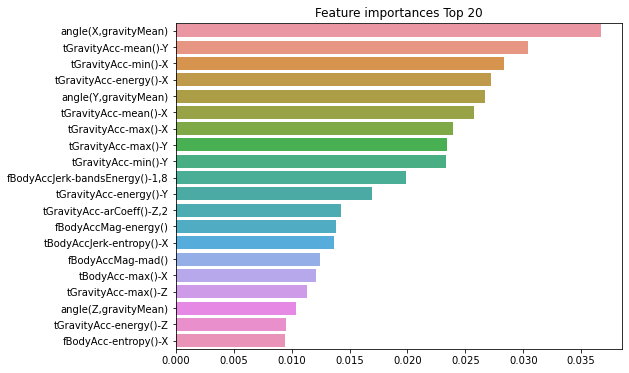

In [27]:
plot_importances(rf_clf_best )

In [28]:
def plot_importances2(estimator, ftr_names ,top=20 ):
    ftr_importances_val = estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_val , index = ftr_names)
    
    ftr_top = ftr_importances.sort_values(ascending=False)[:top]
    plt.figure(figsize=(8,6))
    plt.title('Feature Importances Top' + str(top))
    sns.barplot(x=ftr_top , y=ftr_top.index)
    plt.show()
    

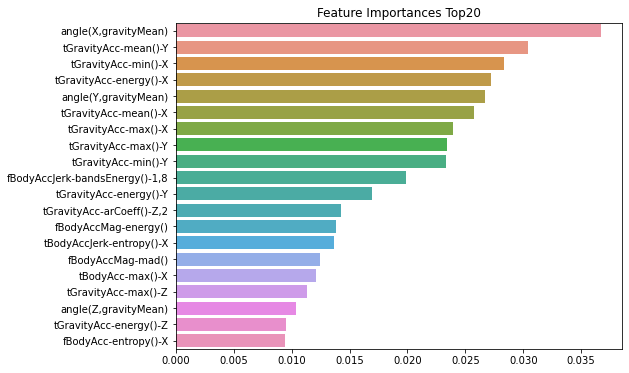

In [29]:
plot_importances2(rf_clf_best , X_train.columns)

# GBM(Gradient Boosting Machine)

### 부스팅(Boosting)
- 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서
- 잘못 예측된 데이터에 가중치(weight) 부여를 통해
- 오류를 개선해 나가면서 학습하는 방식

### 대표적 부스팅 알고리즘
- AdaBoost(Adaptive Boosting) : 에이다 부스트
- GBM(Gradient Boosting Machine) : 그래디언트 부스트

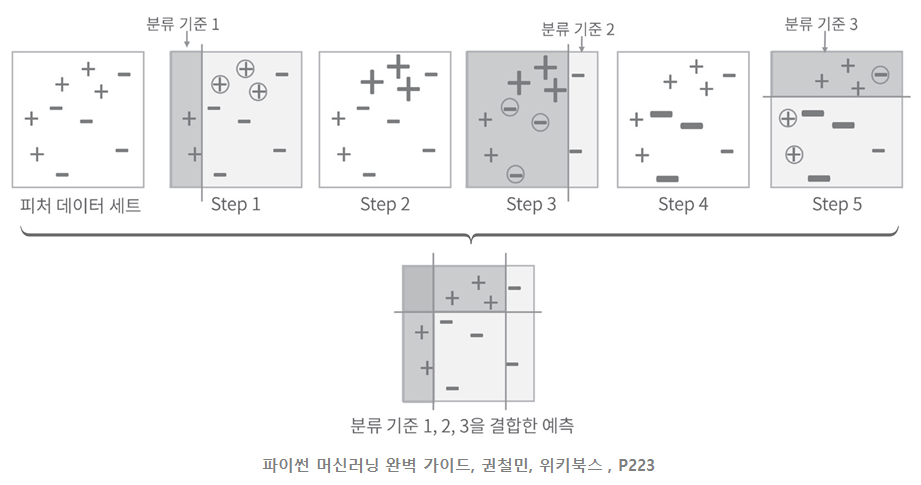

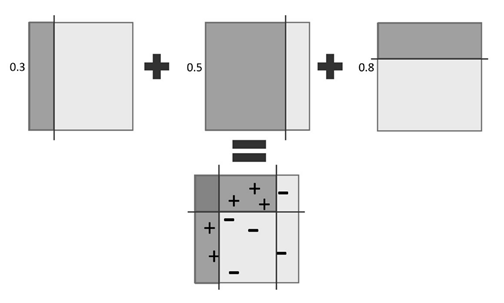

## GBM(Gradient Boosting Machine) : 그래디언트 부스트
- 에이다 부스트와 유사하지만
- 가중치 업데이터를 경사 하강법을 이용하는 것이 큰 차이
- 분류와 회귀 둘 다 가능

경사 하강법(Gradient Descent)
- 함수의 기울기(경사)를 구하고 경사의 절대값이 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복시키는 것(위키백과)
- 제시된 함수의 기울기로 최소값을 찾아내는 머신러닝 알고리즘
- 매개변수를 반복적으로 조정해서 최소 함수값을 갖게하는 독립변수를 찾는 방법

CART 기반 알고리즘
- Classification And Regression Tree

## GBM 예제
- GBM을 이용해 사용자 행동 데이터 세트를 예측 분류 수행
- 사이킷런의 GradientBoostingClassifier 클래스 사용
- 앞에서 작성한 get_new_feature_name_df() 함수와 get_human_dataset( ) 함수 사용

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
import time

X_train , X_test , y_train , y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
pred = gb_clf.predict(X_test)
acc = accuracy_score(y_test , pred)

print('GBM 정확도' , acc)
print('GBM 수행시간{0:.1f}초'.format(time.time()-start_time))

C:\Users\hspar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GBM 정확도 0.9389209365456397
GBM 수행시간538.5초


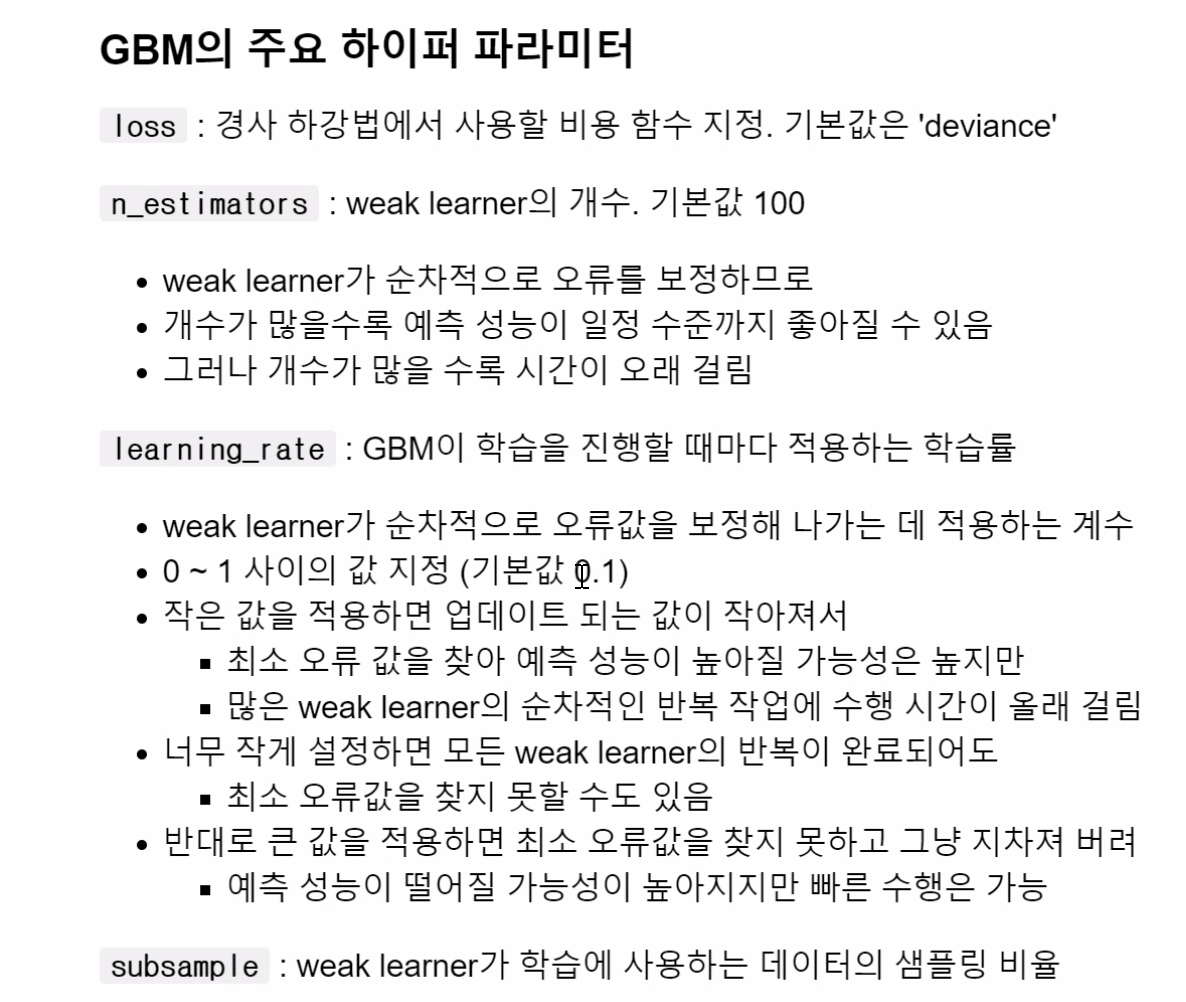

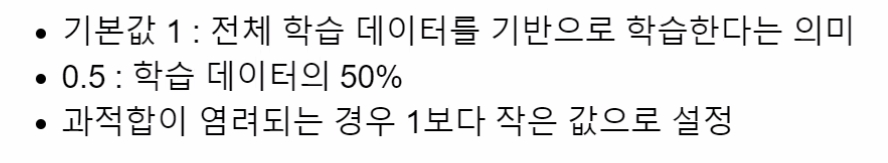

 ## GBM 하이퍼 파라미터 및 튜닝

### GBM의 주요 하이퍼 파라미터  

**`loss`** : 경사 하강법에서 사용할 비용 함수 지정. 기본값은 'deviance'
    
**`n_estimators`** : weak learner의 개수. 기본값 100

**`learning_rate`** : GBM이 학습을 진행할 때마다 적용하는 학습률

**`subsample`** : weak learner가 학습에 사용하는 데이터의 샘플링 비율

### GridSearchCV 이용해서 하이퍼 파라미터 최적화

In [ ]:
start_time = time.time()
params = {'n_estimators' : [100, 500] ,
         'learning_rate' : [0.05 , 0.1]}

grid_cv = GridSearchCV(gb_clf, param_grid=params , cv=2 , verbose=1)
grid_cv.fit(X_train , y_train)


print('최적 하이퍼파라미터 : ' , grid_cv.best_params_ )
print('GBM=>GridSerarchCV 수행시간{0:.1f}초'.format(time.time()-start_time))
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

In [85]:
# cv_results

In [86]:
# 최적의 하이퍼파라미터를 적용한 estimator를 학습해서 test 데이터 적용해서 평가

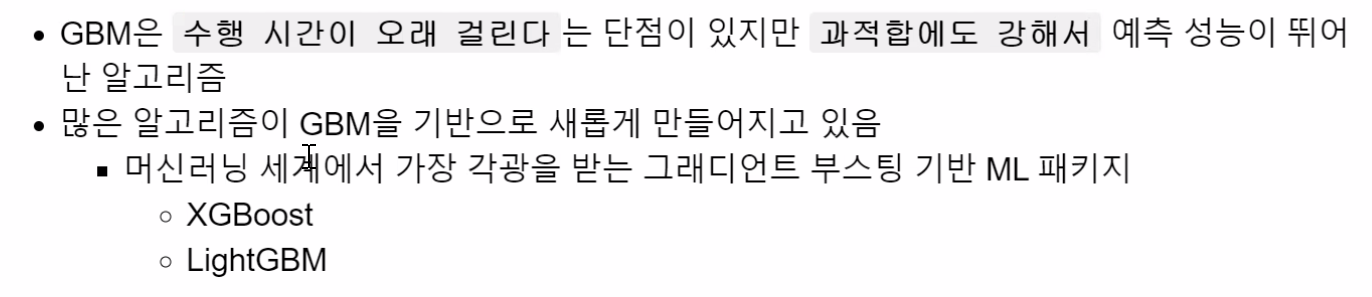